# Notebook 4: PredictiveModelUsingSVM

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from scipy.stats import norm

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
import seaborn as sns 

In [20]:
data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
array = data.values
X = array[:,1:31] # features
y = array[:,0]
le = LabelEncoder()
y = le.fit_transform(y)
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

# Building a Support Vector Machine model


In [21]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.4, random_state=101)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
classifier_score = svm.score(X_test, y_test)
print ('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))


The classifier accuracy score is 0.97



In [22]:
predictions=svm.predict(X_test)

***Model Accuracy: Receiver Operating Characteristic (ROC) curve***

In [23]:
# The confusion matrix helps visualize the performance of the algorithm.
y_pred = svm.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

# Evaluation

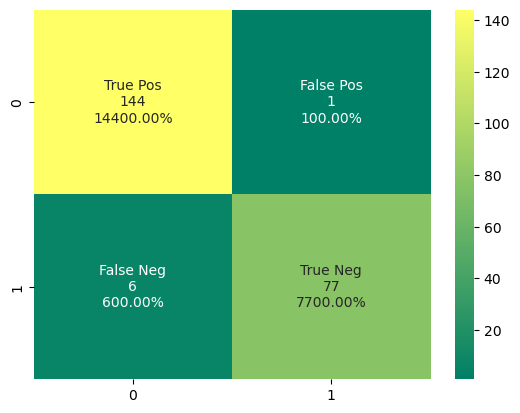

In [24]:
from sklearn.metrics import confusion_matrix 
conf_matrix = confusion_matrix(y_test, predictions) 
# Example confusion matrix 
group_names = ['True Pos','False Pos','False Neg','True Neg'] 
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()] 
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()] 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in 
 zip(group_names, group_counts, group_percentages)] 
labels = np.asarray(labels).reshape(2, 2) 
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='summer') 
plt.show()

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       145
           1       0.99      0.93      0.96        83

    accuracy                           0.97       228
   macro avg       0.97      0.96      0.97       228
weighted avg       0.97      0.97      0.97       228



#  Gridsearch

Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily,
we can be a little lazy and just try a bunch of combinations and see what works best! This idea
of creating a ‘grid’ of parameters and just trying out all the possible combinations is called a
Gridsearch, this method is common enough that Scikit-learn has this functionality built in with
GridSearchCV! The CV stands for cross-validation which is the
GridSearchCV takes a dictionary that describes the parameters that should be tried and a model
to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and
the values are the settings to be tested

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {'C': [0.1,1,5, 10, 50, 100, 1000], 'gamma': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear']}

In [28]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=5)

In [29]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.623 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.618 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.618 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.618 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.971 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.985 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=10, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.985 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=10, kernel=linear;, score=0.985 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

[CV 5/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.985 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.676 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.662 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.691 total time=   0.0s
[CV 1/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.957 total time=   0.0s
[CV 2/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.985 total time=   0.0s
[CV 3/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.971 total time=   0.0s
[CV 4/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.971 total time=   0.0s
[CV 5/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.985 total time=   0.0s
[CV 1/5] END .........C=5, gamma=10, kernel=rbf;, score=0.623 total time=   0.0s
[CV 2/5] END .........C=5, g

[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.956 total time=   0.0s
[CV 4/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.956 total time=   0.0s
[CV 5/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.985 total time=   0.0s
[CV 1/5] END ........C=50, gamma=10, kernel=rbf;, score=0.623 total time=   0.0s
[CV 2/5] END ........C=50, gamma=10, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/5] END ........C=50, gamma=10, kernel=rbf;, score=0.618 total time=   0.0s
[CV 4/5] END ........C=50, gamma=10, kernel=rbf;, score=0.618 total time=   0.0s
[CV 5/5] END ........C=50, gamma=10, kernel=rbf;, score=0.618 total time=   0.0s
[CV 1/5] END .....C=50, gamma=10, kernel=linear;, score=0.942 total time=   0.0s
[CV 2/5] END .....C=50, gamma=10, kernel=linear;, score=0.971 total time=   0.0s
[CV 3/5] END .....C=50, gamma=10, kernel=linear;, score=0.971 total time=   0.0s
[CV 4/5] END .....C=50, gamma=10, kernel=linear;, score=0.971 total time=   0.0s
[CV 5/5] END .....C=50, gamm

[CV 5/5] END ......C=1000, gamma=10, kernel=rbf;, score=0.618 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=10, kernel=linear;, score=0.942 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=10, kernel=linear;, score=0.971 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=10, kernel=linear;, score=0.971 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=10, kernel=linear;, score=0.971 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=10, kernel=linear;, score=0.985 total time=   0.0s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.623 total time=   0.0s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=1, kernel=linear;, score=0.942 total time=   0.0s
[CV 2/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 50, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=5)

In [30]:
grid.best_params_

{'C': 0.1, 'gamma': 10, 'kernel': 'linear'}

In [31]:
grid.best_estimator_

SVC(C=0.1, gamma=10, kernel='linear')

In [32]:
grid_predictions = grid.predict(X_test)

In [33]:
classifier_score = grid.score(X_test, y_test)
print ('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))


The classifier accuracy score is 0.98



# Evaluation

In [34]:
print(confusion_matrix(y_test,grid_predictions))

[[145   0]
 [  5  78]]


In [35]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       145
           1       1.00      0.94      0.97        83

    accuracy                           0.98       228
   macro avg       0.98      0.97      0.98       228
weighted avg       0.98      0.98      0.98       228



In [36]:
input_data=(9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,0.1815,0.06905,0.2773,0.9768,1.909,15.7,0.009606,0.01432,0.01985,0.01421,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.245,0.07773)
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svm.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Women have Benign (Not Cancerous) -Absent in Breast')
else:
  print('The Women have Malignant (Cancerous) - Present in Breast')




[1]
The Women have Malignant (Cancerous) - Present in Breast
